In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter 
from mpl_toolkits.mplot3d import Axes3D
from statannot import add_stat_annotation
import pingouin as pg
import re

In [147]:
# path = "C:/Users/StuartM/Downloads/MscProject-main/MscProject-main/MSC Project\ForceD unity demo/Data/"
path = "C:/Users/StuartM/Downloads/MscProject-main/MscProject-main/MSC Project\ForceD unity demo/Data_Delete_Later/"

files = os.listdir(path)

# print(files)

In [148]:
tmpDF = None
df = None

i = 0 

for file in files:    
    tmpDF = pd.read_json(path + file)
    
    if df is None:
        df = tmpDF
    else:
        df = pd.concat((df, tmpDF))

    i = i+1    

df

,frameNum,userID,trialNumber,phase,force_type,positional_error,target_velocity,endEff_velocity,x_target_pos,y_target_pos,z_target_pos,x_user_pos,y_user_pos,z_user_pos,x_pos_error,y_pos_error,z_pos_error,velocity_error,time
0,0,User_0,1,Baseline,,1.638997,121.148972,26.912998,-1.701013,4.814720,-0.256853,-3.256155,5.317362,-0.133582,1.555142,-0.502642,-0.123271,94.235980,94.155556
1,1,User_0,1,Baseline,,2.622592,144.381668,0.005233,-1.699419,3.210480,-0.257309,-3.256189,5.317409,-0.133580,1.556770,-2.106929,-0.123729,144.376434,94.166670
2,2,User_0,1,Baseline,,2.622985,0.176144,0.009306,-1.697717,3.211314,-0.257795,-3.256127,5.317491,-0.133590,1.558410,-2.106177,-0.124205,0.166838,94.177780
3,3,User_0,1,Baseline,,2.622985,0.000000,0.000000,-1.697717,3.211314,-0.257795,-3.256127,5.317491,-0.133590,1.558410,-2.106177,-0.124205,0.000000,94.188890
4,4,User_0,1,Baseline,,2.623258,0.194438,0.000000,-1.695895,3.212353,-0.258316,-3.256127,5.317491,-0.133590,1.560231,-2.105138,-0.124725,0.194438,94.200005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1346,User_7,9,Training,No_Force,0.053539,NaN,NaN,-2.596999,5.049101,1.864166,-2.608947,4.998550,1.877139,0.011948,0.050550,-0.012973,NaN,610.466700
1347,1347,User_7,9,Training,No_Force,0.055052,NaN,NaN,-2.595491,5.045363,1.862909,-2.606968,4.993671,1.877971,0.011477,0.051692,-0.015062,NaN,610.477800
1348,1348,User_7,9,Training,No_Force,0.056351,NaN,NaN,-2.594023,5.041714,1.861686,-2.605168,4.989081,1.878450,0.011145,0.052633,-0.016764,NaN,610.488900
1349,1349,User_7,9,Training,No_Force,0.057120,NaN,NaN,-2.592619,5.038213,1.860516,-2.603559,4.985206,1.878771,0.010940,0.053008,-0.018255,NaN,610.500000


In [151]:
poln = 135  # 51
order = 2  # 3

sampling_rate = 100
df['user_x_vel'] = np.gradient(savgol_filter(df['x_user_pos'], poln, order), (1 / sampling_rate))
df['user_y_vel'] = np.gradient(savgol_filter(df['y_user_pos'], poln, order), (1 / sampling_rate))
df['user_z_vel'] = np.gradient(savgol_filter(df['z_user_pos'], poln, order), (1 / sampling_rate))

df['user_vel'] = np.sqrt(df['user_x_vel'] ** 2 + df['user_y_vel'] ** 2 + df['user_z_vel'] ** 2)

df['target_x_vel'] = np.gradient(savgol_filter(df['x_target_pos'], poln, order), (1 / sampling_rate))
df['target_y_vel'] = np.gradient(savgol_filter(df['y_target_pos'], poln, order), (1 / sampling_rate))
df['target_z_vel'] = np.gradient(savgol_filter(df['z_target_pos'], poln, order), (1 / sampling_rate))

df['target_vel'] = np.sqrt(df['target_x_vel'] ** 2 + df['target_y_vel'] ** 2 + df['target_z_vel'] ** 2)

df['Vel_Error'] = df['target_vel'] - df['user_vel']

df['group'] = df['userID'].apply(lambda x: 2 if int(re.search(r'\d+', x).group()) % 2 == 0 else 1)

In [152]:
df

,frameNum,userID,trialNumber,phase,force_type,positional_error,target_velocity,endEff_velocity,x_target_pos,y_target_pos,...,user_x_vel,user_y_vel,user_z_vel,user_vel,target_x_vel,target_y_vel,target_z_vel,target_vel,Vel_Error,group
0,0,User_0,1,Baseline,,1.638997,121.148972,26.912998,-1.701013,4.814720,...,0.014733,-0.389232,0.140580,0.414103,0.163172,-0.151832,-0.046621,0.227710,-0.186393,2
1,1,User_0,1,Baseline,,2.622592,144.381668,0.005233,-1.699419,3.210480,...,0.017358,-0.395167,0.136372,0.418397,0.163172,-0.145248,-0.046621,0.223373,-0.195023,2
2,2,User_0,1,Baseline,,2.622985,0.176144,0.009306,-1.697717,3.211314,...,0.022607,-0.407039,0.127955,0.427275,0.163171,-0.132081,-0.046620,0.215043,-0.212232,2
3,3,User_0,1,Baseline,,2.622985,0.000000,0.000000,-1.697717,3.211314,...,0.027856,-0.418910,0.119539,0.436522,0.163170,-0.118913,-0.046620,0.207215,-0.229306,2
4,4,User_0,1,Baseline,,2.623258,0.194438,0.000000,-1.695895,3.212353,...,0.033105,-0.430781,0.111123,0.446113,0.163169,-0.105746,-0.046620,0.199949,-0.246164,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1346,User_7,9,Training,No_Force,0.053539,NaN,NaN,-2.596999,5.049101,...,0.050215,-0.271091,-0.119914,0.300652,0.145996,-0.387341,-0.121663,0.431451,0.130799,1
1347,1347,User_7,9,Training,No_Force,0.055052,NaN,NaN,-2.595491,5.045363,...,0.049664,-0.271682,-0.120318,0.301254,0.145995,-0.389718,-0.121662,0.433585,0.132332,1
1348,1348,User_7,9,Training,No_Force,0.056351,NaN,NaN,-2.594023,5.041714,...,0.049114,-0.272272,-0.120722,0.301857,0.145994,-0.392094,-0.121662,0.435722,0.133865,1
1349,1349,User_7,9,Training,No_Force,0.057120,NaN,NaN,-2.592619,5.038213,...,0.048564,-0.272862,-0.121126,0.302462,0.145993,-0.394471,-0.121661,0.437861,0.135399,1


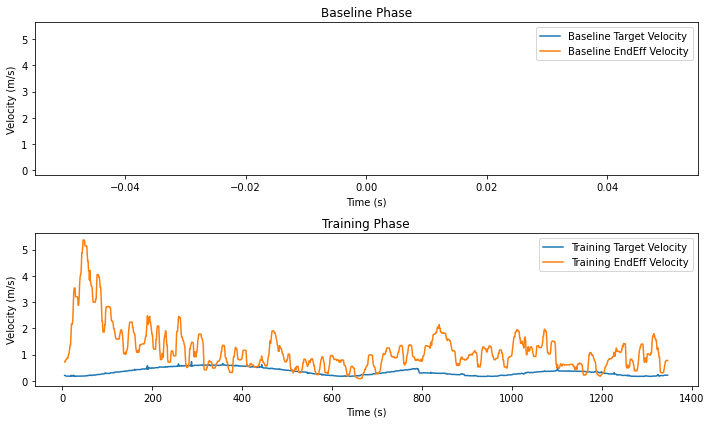

In [99]:
# Define the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharey=True)
#fig, ax2 = plt.subplots(figsize=(10, 6))

# Baseline data
mask_baseline = (df['phase'] == "Baseline") & (df['trialNumber'] == 10) & (df['userID'] == "User_8")
ax1.plot(df[mask_baseline].target_velocity.rolling(10, center=True).median(), label='Baseline Target Velocity')
ax1.plot(df[mask_baseline].endEff_velocity.rolling(10, center=True).median(), label='Baseline EndEff Velocity')

# Customize the first subplot (Baseline)
ax1.set_title('Baseline Phase')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)')
ax1.legend()

#plt.savefig('Baseline.png', dpi=600, bbox_inches='tight')

mask_training = (df['phase'] == "Training") & (df['trialNumber'] == 10)
ax2.plot(df[mask_training].target_velocity.rolling(10, center=True).median(), label='Training Target Velocity')
ax2.plot(df[mask_training].endEff_velocity.rolling(10, center=True).median(), label='Training EndEff Velocity')

ax2.set_title('Training Phase')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Velocity (m/s)')
ax2.legend()

#plt.savefig('Training.png', dpi=600, bbox_inches='tight')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [31]:
df['target_velocity_filtered'] = df['target_velocity'].rolling(10, center=True).median()
df['endEff_velocity_filtered'] = df['endEff_velocity'].rolling(10, center=True).median()

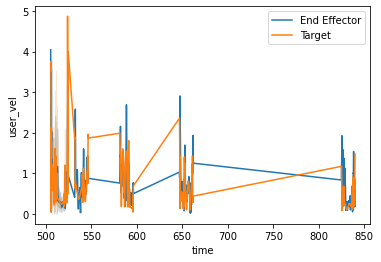

In [29]:
# plt.plot(df[mask]['user_vel'],'r')
# plt.plot(df[mask]['target_vel'],'g')

mask = (df['phase'] == "Training") & (df['trialNumber'] == 4) 

sns.lineplot(data=df[mask], x='time', y='user_vel')
sns.lineplot(data=df[mask], x='time', y='target_vel')
plt.legend(['End Effector','Target'])

KeyboardInterrupt: 

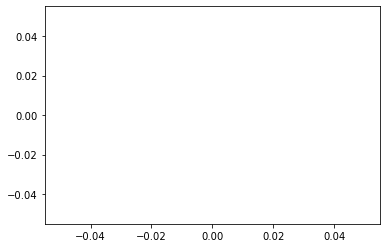

In [30]:
#mask = (df['phase'] == "Baseline") & (df['trialNumber'] == 1) 
# Filter rows where 'target_velocity' is not greater than 10
# filtered_df = df[df['target_velocity'] < 10]
# filtered_df = df[df['endEff_velocity'] < 100]

sns.lineplot(data=df, x='time', y='x_target_pos', label='Target Velocity')
sns.lineplot(data=df, x='time', y='x_user_pos', label='End Effector')  # Adding the new y variable
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Comparison of Target Velocity and End Effector')
plt.legend()
plt.ylim([-5,6])
plt.show()

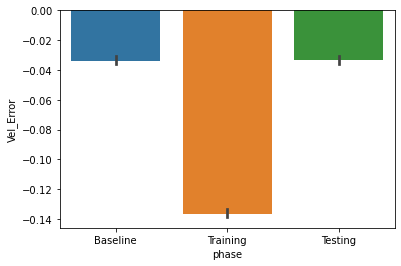

In [69]:
order = ['Baseline', 'Training', 'Testing']
sns.barplot(data=df, x='phase', y='Vel_Error', order=order)
#plt.savefig('Vel_Error_summary.png', dpi=600, bbox_inches='tight')

<AxesSubplot:xlabel='phase', ylabel='Vel_Error'>

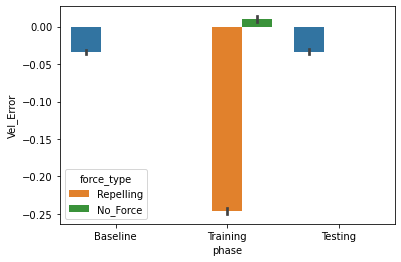

In [133]:
order = ['Baseline', 'Training', 'Testing']
sns.barplot(data=df, x='phase', y='Vel_Error', order=order, hue= 'force_type')
#plt.savefig('Vel_Error_summary.png', dpi=600, bbox_inches='tight')

<AxesSubplot:xlabel='phase', ylabel='positional_error'>

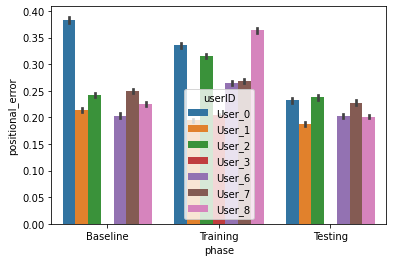

In [106]:
order = ['Baseline', 'Training', 'Testing']
sns.barplot(data=df, x='phase', y='positional_error', order=order, hue = 'userID')
#plt.savefig('Pos_Error_summary.png', dpi=600, bbox_inches='tight')

In [ ]:
df.to_csv('all_data.csv')

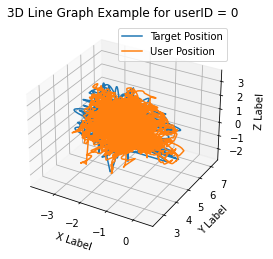

In [322]:
# Filter the DataFrame for userID = 0
df_user_0 = df[df['userID'] == 'User_0']

# Create a figure and a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract coordinates for userID = 0 from the filtered DataFrame
x_target = df_user_0['x_target_pos']
y_target = df_user_0['y_target_pos']
z_target = df_user_0['z_target_pos']

x_user = df_user_0['x_user_pos']
y_user = df_user_0['y_user_pos']
z_user = df_user_0['z_user_pos']

# Plot the 3D lines
ax.plot(x_target, y_target, z_target, label='Target Position')
ax.plot(x_user, y_user, z_user, label='User Position')

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Line Graph Example for userID = 0')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
#produce a heat map of positional error

In [14]:
# Define the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharey=True)

# Baseline data
mask_baseline = (df['phase'] == "Baseline") & (df['trialNumber'] == 10)
ax1.plot(df[mask_baseline].target_velocity.rolling(10, center=True).median(), label='Baseline Target Velocity')
ax1.plot(df[mask_baseline].endEff_velocity.rolling(10, center=True).median(), label='Baseline EndEff Velocity')

# Customize the first subplot (Baseline)
ax1.set_title('Baseline Phase')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)')
ax1.legend()

# Save the first subplot as a PNG file
plt.savefig('baseline_graph.png')

# Clear the figure to create a new one
plt.clf()

# Training data
mask_training = (df['phase'] == "Training") & (df['trialNumber'] == 10)
ax2.plot(df[mask_training].target_velocity.rolling(10, center=True).median(), label='Training Target Velocity')
ax2.plot(df[mask_training].endEff_velocity.rolling(10, center=True).median(), label='Training EndEff Velocity')

# Customize the second subplot (Training)
ax2.set_title('Training Phase')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Velocity (m/s)')
ax2.legend()

# Save the second subplot as a PNG file
plt.savefig('training_graph.png')

# Close the figure to release resources (optional)
plt.close()


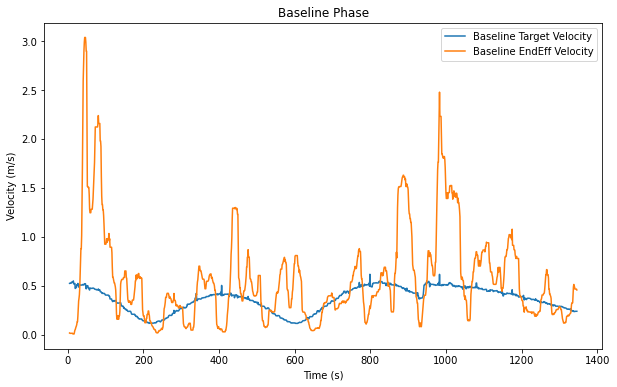

In [130]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Baseline data
mask_baseline = (df['phase'] == "Baseline") & (df['trialNumber'] == 10)
ax1.plot(df[mask_baseline].target_velocity.rolling(10, center=True).median(), label='Baseline Target Velocity')
ax1.plot(df[mask_baseline].endEff_velocity.rolling(10, center=True).median(), label='Baseline EndEff Velocity')

# Customize the first subplot (Baseline)
ax1.set_title('Baseline Phase')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)')
ax1.legend()

#plt.savefig('Baseline.png', dpi=600, bbox_inches='tight')

# Show the plot (if needed)
plt.show()

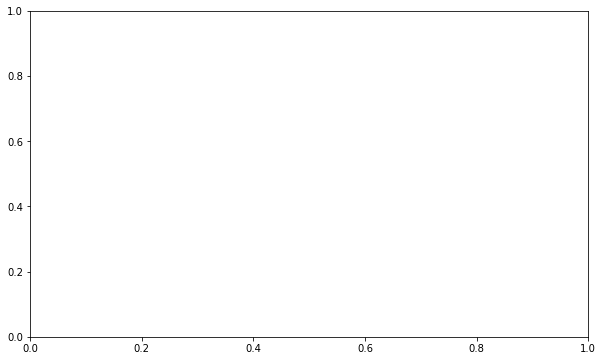

In [129]:
fig, ax1 = plt.subplots(figsize=(10, 6))

mask_training = (df['phase'] == "Training") & (df['trialNumber'] == 10)
ax2.plot(df[mask_training].target_velocity.rolling(10, center=True).median(), label='Training Target Velocity')
ax2.plot(df[mask_training].endEff_velocity.rolling(10, center=True).median(), label='Training EndEff Velocity')

# Customize the second subplot (Training)
ax2.set_title('Training Phase')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Velocity (m/s)')
ax2.legend()


plt.savefig('Training.png', dpi=600, bbox_inches='tight')

# Show the plot (if needed)
plt.show()





ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

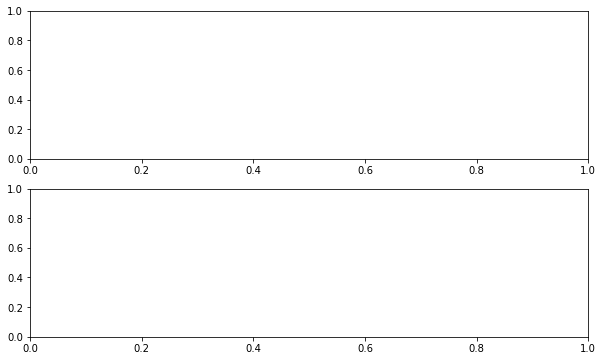

In [95]:

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharey=True)

# Baseline data
mask_baseline1 = (df['phase'] == "Baseline") & (df['trialNumber'] == 10)
ax1.plot(df[mask_baseline].index, df[mask_baseline]['target_vel'], label='Baseline Target Velocity')
ax1.plot(df[mask_baseline].index, df[mask_baseline]['user_vel'], label='Baseline User Velocity')

# Customize the first subplot (Baseline)
ax1.set_title('Baseline Phase')
ax1.set_xlabel('Time (index)')
ax1.set_ylabel('Velocity (m/s)')
ax1.legend()

# Training data
mask_training1 = (df['phase'] == "Training") & (df['trialNumber'] == 10)
ax2.plot(df[mask_training].index, df[mask_training]['target_vel'], label='Training Target Velocity')
ax2.plot(df[mask_training].index, df[mask_training]['user_vel'], label='Training User Velocity')

# Customize the second subplot (Training)
ax2.set_title('Training Phase')
ax2.set_xlabel('Time (index)')
ax2.set_ylabel('Velocity (m/s)')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


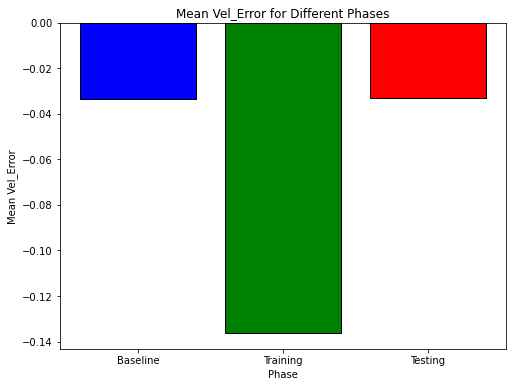

In [53]:

# Assuming you have separate DataFrames or subsets for each phase
baseline_data = df[df['phase'] == 'Baseline']
training_data = df[df['phase'] == 'Training']
testing_data = df[df['phase'] == 'Testing']

# Define colors for each phase
colors = ['blue', 'green', 'red']

# Create a bar plot for Vel_Error with custom colors
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
bars = plt.bar(['Baseline', 'Training', 'Testing'],
               [baseline_data['Vel_Error'].mean(),
                training_data['Vel_Error'].mean(),
                testing_data['Vel_Error'].mean()],
               color=colors)

# Customize the appearance of the bars (if needed)
for bar in bars:
    bar.set_edgecolor('black')  # Add black borders to the bars

plt.title('Mean Vel_Error for Different Phases')
plt.xlabel('Phase')
plt.ylabel('Mean Vel_Error')
plt.show()


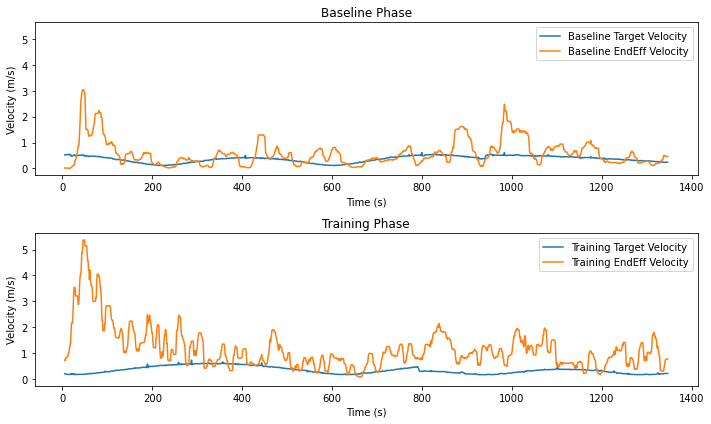

In [131]:
# Define the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharey=True)
#fig, ax2 = plt.subplots(figsize=(10, 6))

# Baseline data
mask_baseline = (df['phase'] == "Baseline") & (df['trialNumber'] == 10) #& (df['userID'] == "User_0")
ax1.plot(df[mask_baseline].target_velocity.rolling(10, center=True).median(), label='Baseline Target Velocity')
ax1.plot(df[mask_baseline].endEff_velocity.rolling(10, center=True).median(), label='Baseline EndEff Velocity')

# Customize the first subplot (Baseline)
ax1.set_title('Baseline Phase')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)')
ax1.legend()

#plt.savefig('Baseline.png', dpi=600, bbox_inches='tight')

mask_training = (df['phase'] == "Training") & (df['trialNumber'] == 10)
ax2.plot(df[mask_training].target_velocity.rolling(10, center=True).median(), label='Training Target Velocity')
ax2.plot(df[mask_training].endEff_velocity.rolling(10, center=True).median(), label='Training EndEff Velocity')

ax2.set_title('Training Phase')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Velocity (m/s)')
ax2.legend()

#plt.savefig('Training.png', dpi=600, bbox_inches='tight')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

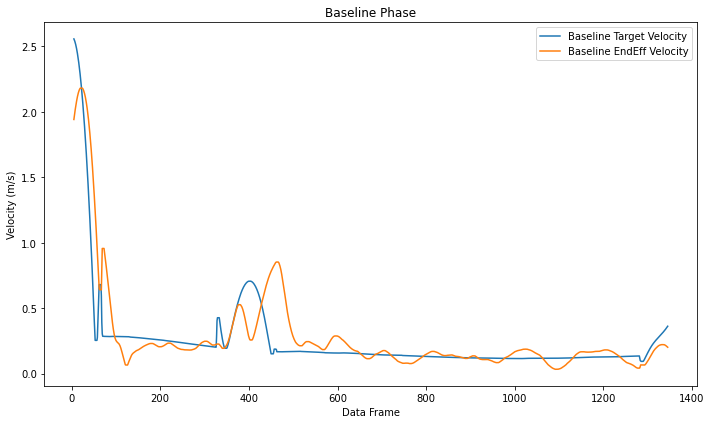

In [128]:
# Define the figure and axes
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharey=True)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Baseline data
mask_baseline = (df['phase'] == "Baseline") & (df['trialNumber'] == 10) & (df['userID'] == "User_8")
ax1.plot(df[mask_baseline].target_vel.rolling(10, center=True).median(), label='Baseline Target Velocity')
ax1.plot(df[mask_baseline].user_vel.rolling(10, center=True).median(), label='Baseline EndEff Velocity')

# Customize the first subplot (Baseline)
ax1.set_title('Baseline Phase')
ax1.set_xlabel('Data Frame')
ax1.set_ylabel('Velocity (m/s)')
ax1.legend()

#plt.savefig('Baseline.png', dpi=600, bbox_inches='tight')

#mask_training = (df['phase'] == "Training") & (df['trialNumber'] == 10) & (df['userID'] == "User_8")
#ax2.plot(df[mask_training].target_vel.rolling(10, center=True).median(), label='Training Target Velocity')
#ax2.plot(df[mask_training].user_vel.rolling(10, center=True).median(), label='Training EndEff Velocity')

#ax2.set_title('Training Phase')
#ax2.set_xlabel('Data Frame')
#ax2.set_ylabel('Velocity (m/s)')
#ax2.legend()

#plt.savefig('Training.png', dpi=600, bbox_inches='tight')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

No handles with labels found to put in legend.


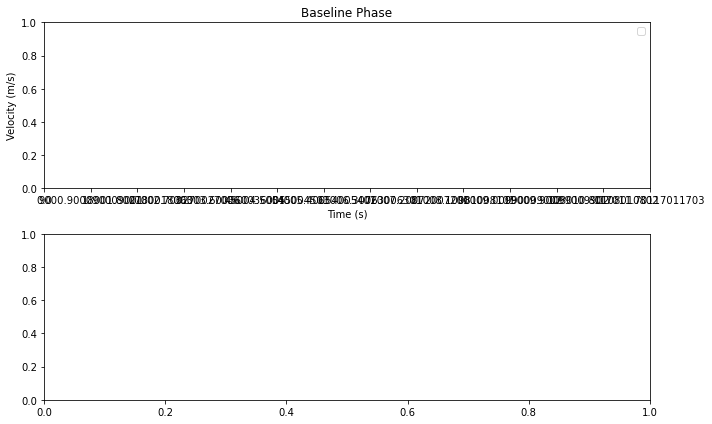

In [124]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharey=True)
#fig, ax2 = plt.subplots(figsize=(10, 6))

# Baseline data
mask_baseline = (df['phase'] == "Baseline") & (df['trialNumber'] == 10) & (df['userID'] == "User_8")
ax1.plot(df[mask_baseline].target_vel.rolling(10, center=True).median(), label='Baseline Target Velocity')
ax1.plot(df[mask_baseline].user_vel.rolling(10, center=True).median(), label='Baseline EndEff Velocity')

# Customize the first subplot (Baseline)
ax1.set_title('Baseline Phase')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)')
ax1.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
